In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [70]:
data=pd.read_csv('../input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [72]:
data.shape

(891, 12)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leonard, Mr. Lionel",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [75]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

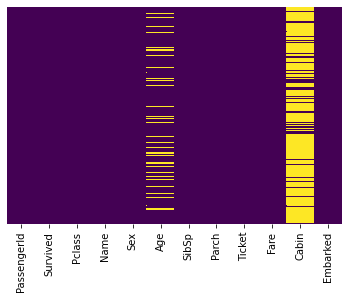

In [77]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [78]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


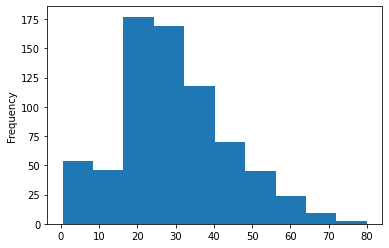

In [79]:
data['Age'].plot.hist()

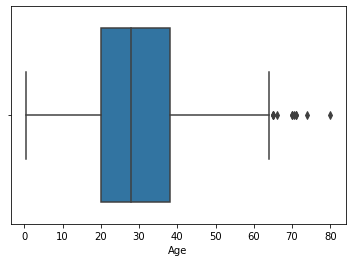

In [80]:
sns.boxplot(data['Age'])

In [81]:
extreme=data['Age'].mean()+3*data['Age'].std()
extreme

73.27860964406095

In [82]:
def impute_na(data,variable,extreme):
    data[variable]=data[variable].fillna(extreme)

In [83]:
impute_na(data,'Age',extreme)

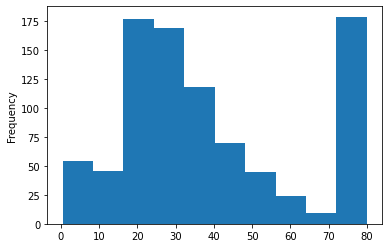

In [84]:
data['Age'].plot.hist()

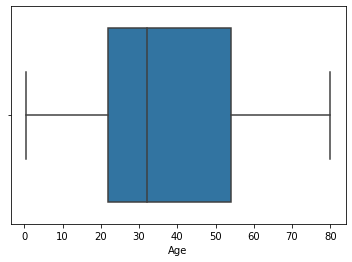

In [85]:
sns.boxplot(data['Age'])

In [86]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
print(len(data[data['Cabin'].isnull()]))

687


In [88]:
data.drop('Cabin',1,inplace=True)

In [89]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [90]:
data['Ticket'].value_counts()

CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
           ..
350029      1
350043      1
112050      1
113056      1
330980      1
Name: Ticket, Length: 681, dtype: int64

In [91]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [92]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


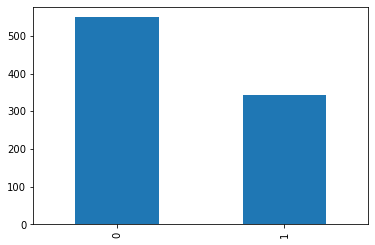

In [93]:
data['Survived'].value_counts().plot(kind='bar')

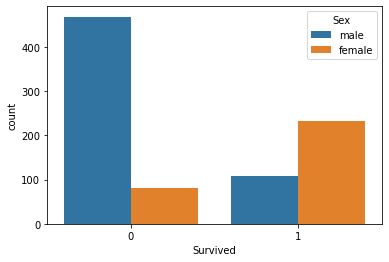

In [94]:
sns.countplot(x='Survived',hue='Sex',data=data)

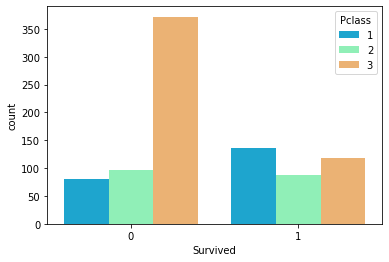

In [95]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

In [96]:
data['Embarked'].isnull().mean()

0.002244668911335578

In [97]:
print(data[data['Embarked'].isnull()])

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61            62         1       1  female  38.0      0      0  80.0      NaN
829          830         1       1  female  62.0      0      0  80.0      NaN


In [98]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
embark=data['Embarked'].mode()[0]
data['Embarked'].fillna(embark,inplace=True)

In [100]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [101]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [102]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [103]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [104]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [105]:
data=pd.concat([data,sex,embark],axis=1)

In [106]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


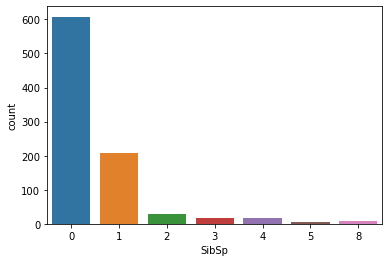

In [107]:
sns.countplot(x='SibSp',data=data)

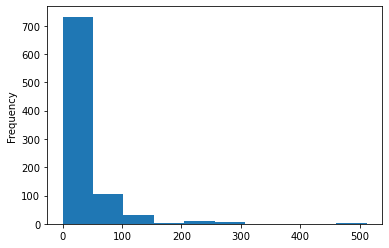

In [108]:
data['Fare'].plot.hist()

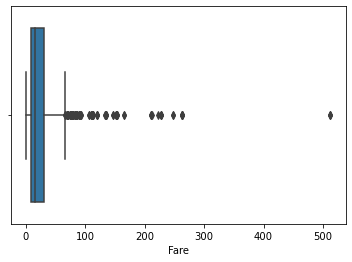

In [109]:
sns.boxplot(data['Fare'])

In [110]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [195]:
x=df.iloc[:891,:-1]
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,3.0,22.0,1.0,0.0,7.2500,1.0,0,1
1,2.0,1.0,38.0,1.0,0.0,71.2833,0.0,0,0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0.0,0,1
3,4.0,1.0,35.0,1.0,0.0,53.1000,0.0,0,1
4,5.0,3.0,35.0,0.0,0.0,8.0500,1.0,0,1


In [196]:
x.drop('PassengerId',axis=1,inplace=True)

In [197]:
x.tail()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,2.0,27.00000,0.0,0.0,13.00,1.0,0,1
887,1.0,19.00000,0.0,0.0,30.00,0.0,0,1
888,3.0,73.27861,1.0,2.0,23.45,0.0,0,1
889,1.0,26.00000,0.0,0.0,30.00,1.0,0,0
890,3.0,32.00000,0.0,0.0,7.75,1.0,1,0


In [198]:
y=data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [200]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 8)
(623,)
(268, 8)
(268,)


In [201]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x,y)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [202]:
pred_log=log.predict(x_test)
pred_log[:5]

array([0, 0, 0, 1, 1])

In [203]:
print(log.score(x_test,y_test))
print(log.score(x_train,y_train))

0.8097014925373134
0.8025682182985554


In [204]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_test,pred_log))
print(accuracy_score(y_test,pred_log))
print(confusion_matrix(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.72      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

0.8097014925373134
[[145  23]
 [ 28  72]]


In [205]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(x,y)

pred_tree=tree.predict(x_test)
pred_tree[:5]

array([0, 0, 0, 1, 1])

In [206]:
print(classification_report(y_test,pred_tree))
print(accuracy_score(y_test,pred_tree))
print(confusion_matrix(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       168
           1       0.86      0.72      0.78       100

    accuracy                           0.85       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.85      0.85      0.85       268

0.8507462686567164
[[156  12]
 [ 28  72]]


In [207]:
from sklearn.naive_bayes import GaussianNB
gau=GaussianNB()
gau.fit(x,y)

GaussianNB()

In [208]:
pred_gau=gau.predict(x_test)
pred_gau[:5]

array([0, 0, 0, 1, 1])

In [209]:
print(classification_report(y_test,pred_gau))
print(accuracy_score(y_test,pred_gau))
print(confusion_matrix(y_test,pred_gau))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       168
           1       0.71      0.74      0.73       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

0.7910447761194029
[[138  30]
 [ 26  74]]


In [210]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

pred_knn=knn.predict(x_test)
pred_knn[:5]

array([0, 0, 0, 1, 0])

In [211]:
print(classification_report(y_test,pred_knn))
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       168
           1       0.78      0.66      0.71       100

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268

0.8022388059701493
[[149  19]
 [ 34  66]]


In [212]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [213]:
from sklearn.model_selection import RandomizedSearchCV
# Number of tress would you define
n_estimators=[int(x) for x in np.linspace(start=300,stop=2000,num=10)]
# Number of features to consider
max_features=['auto','sqrt','log2']
# maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,num=10)]
# Minimum number of samples required to split
min_samples_split=[1,3,5,7,9,10,12,15]
# minimum number samples required at each node
min_samples_leaf=[1,3,5,7,0.1,0.5,0.2,10,0.1]


random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'criterion':['entrophy','gini']}

In [214]:
random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=10,n_iter=100,verbose=2,n_jobs=-1,random_state=0)
random.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.8min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entrophy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 0.1,
                                                             0.5, 0.2, 10,
                                                             0.1],
                                        'min_samples_split': [1, 3, 5, 7, 9, 10,
                                                              12, 15],
                                        'n_estimators': [300, 488, 677, 866,
                    

In [215]:
random.best_estimator_

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=3,
                       min_samples_split=10, n_estimators=677)

In [216]:
random.best_score_

0.8282642089093702

In [217]:
random_st=random.best_estimator_

In [218]:
random_pred=random_st.predict(x_test)
random_pred[:5]

array([0, 0, 0, 1, 1])

In [219]:
print(classification_report(y_test,random_pred))
print(confusion_matrix(y_test,random_pred))
print(accuracy_score(y_test,random_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.80      0.70      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268

[[150  18]
 [ 30  70]]
0.8208955223880597


In [220]:
random.best_params_

{'n_estimators': 677,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 120,
 'criterion': 'gini'}

## GridSearchCV

In [221]:
params={'criterion':[random.best_params_['criterion']],
       'max_depth':[random.best_params_['max_depth']],
       'max_features':[random.best_params_['max_features']],
       'min_samples_split':[random.best_params_['min_samples_split']-1,
                           random.best_params_['min_samples_split'],
                           random.best_params_['min_samples_split']+1,
                           random.best_params_['min_samples_split']+2],
        'min_samples_leaf':[random.best_params_['min_samples_leaf']-2,
                            random.best_params_['min_samples_split']-1,
                            random.best_params_['min_samples_leaf'],
                            random.best_params_['min_samples_leaf']+1,
                            random.best_params_['min_samples_leaf']+2],
        'n_estimators':[random.best_params_['n_estimators']-200,
                       random.best_params_['n_estimators']-100,
                       random.best_params_['n_estimators'],
                       random.best_params_['n_estimators']+100,
                       random.best_params_['n_estimators']+200]
       }



In [223]:
params

{'criterion': ['gini'],
 'max_depth': [120],
 'max_features': ['log2'],
 'min_samples_split': [9, 10, 11, 12],
 'min_samples_leaf': [1, 9, 3, 4, 5],
 'n_estimators': [477, 577, 677, 777, 877]}

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
grid_model=GridSearchCV(estimator=rf,param_grid=params,cv=10,n_jobs=-1,verbose=2)
grid_model.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [120],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 9, 3, 4, 5],
                         'min_samples_split': [9, 10, 11, 12],
                         'n_estimators': [477, 577, 677, 777, 877]},
             verbose=2)

In [226]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=4,
                       min_samples_split=11, n_estimators=477)

In [228]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 120,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 11,
 'n_estimators': 477}

In [229]:
grid_best=grid_model.best_estimator_
grid_best

RandomForestClassifier(max_depth=120, max_features='log2', min_samples_leaf=4,
                       min_samples_split=11, n_estimators=477)

In [230]:
grid_pred=grid_best.predict(x_test)
grid_pred[:6]

array([0, 0, 0, 1, 1, 0])

In [231]:
print(classification_report(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(accuracy_score(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       168
           1       0.81      0.69      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

[[152  16]
 [ 31  69]]
0.8246268656716418


In [232]:
grid_pred[:]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [234]:
pred_tree[:]

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [237]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892.0,3.0,22.0,0.0,0.0,7.8292,1.0,1,0
1,893.0,3.0,38.0,1.0,0.0,7.0000,0.0,0,1
2,894.0,2.0,26.0,0.0,0.0,9.6875,1.0,1,0
3,895.0,3.0,35.0,0.0,0.0,8.6625,1.0,0,1
4,896.0,3.0,35.0,1.0,1.0,12.2875,0.0,0,1


In [238]:
test_data.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
413,1305.0,3.0,73.27861,0.0,0.0,8.0500,1.0,0,1
414,1306.0,1.0,44.00000,0.0,0.0,108.9000,0.0,0,0
415,1307.0,3.0,73.27861,0.0,0.0,7.2500,1.0,0,1
416,1308.0,3.0,34.00000,0.0,0.0,8.0500,1.0,0,1
417,1309.0,3.0,18.00000,1.0,1.0,22.3583,1.0,0,0


In [249]:
preds=tree.predict_proba(x_test)

In [250]:
preds[:]

array([[0.89876543, 0.10123457],
       [0.89876543, 0.10123457],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.34782609, 0.65217391],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.06666667, 0.93333333],
       [0.51388889, 0.48611111],
       [0.34782609, 0.65217391],
       [0.89876543, 0.10123457],
       [0.08823529, 0.91176471],
       [0.89876543, 0.10123457],
       [0.08823529, 0.91176471],
       [0.        , 1.        ],
       [0.59459459, 0.40540541],
       [0.89876543, 0.10123457],
       [0.89876543, 0.10123457],
       [0.89876543, 0.10123457],
       [0.        , 1.        ],
       [0.89876543, 0.10123457],
       [0.        , 1.        ],
       [0.89876543, 0.10123457],
       [0.83333333, 0.16666667],
       [0.59459459, 0.40540541],
       [0.        , 1.        ],
       [0.89876543, 0.10123457],
       [0.59459459, 0.40540541],
       [0.08823529, 0.91176471],
       [0.66666667, 0.33333333],
       [0.

In [259]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [261]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3.0,22.0,1.0,0.0,7.2500,1.0,0,1
1,1.0,38.0,1.0,0.0,71.2833,0.0,0,0
2,3.0,26.0,0.0,0.0,7.9250,0.0,0,1
3,1.0,35.0,1.0,0.0,53.1000,0.0,0,1
4,3.0,35.0,0.0,0.0,8.0500,1.0,0,1


In [263]:
columns

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [268]:
xc=list(x)
xc

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [270]:
test_data.tail()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
413,1305.0,3.0,73.27861,0.0,0.0,8.0500,1.0,0,1
414,1306.0,1.0,44.00000,0.0,0.0,108.9000,0.0,0,0
415,1307.0,3.0,73.27861,0.0,0.0,7.2500,1.0,0,1
416,1308.0,3.0,34.00000,0.0,0.0,8.0500,1.0,0,1
417,1309.0,3.0,18.00000,1.0,1.0,22.3583,1.0,0,0


In [271]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892.0,3.0,22.0,0.0,0.0,7.8292,1.0,1,0
1,893.0,3.0,38.0,1.0,0.0,7.0000,0.0,0,1
2,894.0,2.0,26.0,0.0,0.0,9.6875,1.0,1,0
3,895.0,3.0,35.0,0.0,0.0,8.6625,1.0,0,1
4,896.0,3.0,35.0,1.0,1.0,12.2875,0.0,0,1


In [272]:
test_data1=pd.read_csv('../input/titanic/test.csv')
test_data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [274]:
test_data1.drop(['Name','Cabin'],axis=1,inplace=True)

In [275]:
test_data1['Age'].median()

27.0

In [276]:
test_data1['Age']=test_data1['Age'].fillna(median)

In [277]:
test_data1['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [278]:
sex=pd.get_dummies(test_data1['Sex'],drop_first=True)
embark=pd.get_dummies(test_data1['Embarked'],drop_first=True)
test_data1=pd.concat([test_data1,sex,embark],axis=1)
test_data1.drop(['Sex','Embarked'],axis=1,inplace=True)

In [279]:
test_data1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,34.5,0,0,330911,7.8292,1,1,0
1,893,3,47.0,1,0,363272,7.0000,0,0,1
2,894,2,62.0,0,0,240276,9.6875,1,1,0
3,895,3,27.0,0,0,315154,8.6625,1,0,1
4,896,3,22.0,1,1,3101298,12.2875,0,0,1


In [280]:
test_data1.drop('Ticket',1,inplace=True)

In [281]:
test_data1.dropna(inplace=True)

In [282]:
test_data1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [296]:
test_data1['Survived']=tree.predict(test_data1[xc])

In [299]:
sub=test_data1[['PassengerId','Survived']]
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [302]:
sub.to_csv('Submission_reportfinal.csv',index=False)